In [17]:
import numpy as np
import matplotlib.pyplot as plt
from rfmodel.core.config import load_yaml
from rfmodel.core.signal import Signal
from rfmodel.core.pipeline_builder import pipeline_from_config
from rfmodel.core.units import w_to_dbm

# This import is required so the registry registers block types (like "lna")
import rfmodel.rf.registry  # noqa: F401


In [2]:
cfg = load_yaml("..\configs\pipeline_LNA_demo.yaml")
cfg

{'pipeline': [{'type': 'lna',
   'name': 'lna1',
   'seed': 1,
   'params': {'gain_db': 15.0, 'nf_db': 3.0}},
  {'type': 'lna',
   'name': 'lna2',
   'seed': 2,
   'params': {'gain_db': 10.0, 'nf_db': 5.0}}]}

In [3]:
pipe = pipeline_from_config(cfg)
pipe

Pipeline(blocks=[LNABlock(name='lna1', enabled=True), LNABlock(name='lna2', enabled=True)])

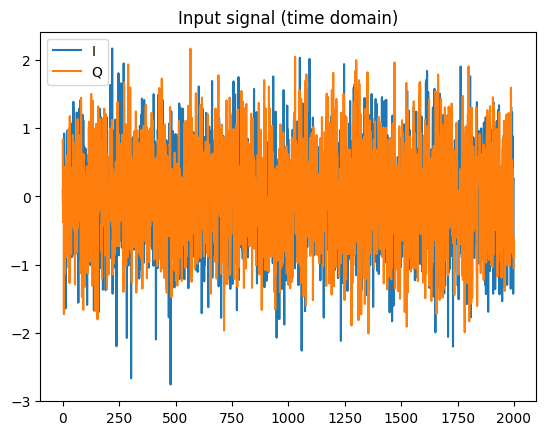

In [10]:
# Create a dummy signal
fs = 20e6
N = 100000
rng = np.random.default_rng(0) 
x = (rng.normal(0, 1/np.sqrt(2), N) + 1j*rng.normal(0, 1/np.sqrt(2), N)).astype(np.complex128) # Creates a complex number of N elements with 1/np.sqrt(2) varaince so the unit power becomes |E(x)|^2 = 1
sig_in = Signal(x=x, fs_hz=fs)
plt.plot(np.real(x[:2000]), label="I")
plt.plot(np.imag(x[:2000]), label="Q")
plt.legend()
plt.title("Input signal (time domain)")
plt.show()

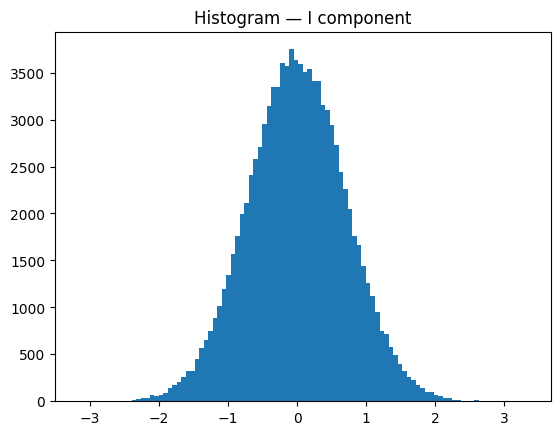

In [11]:
plt.hist(np.real(x), bins=100)
plt.title("Histogram — I component")
plt.show()


In [ ]:
sig_out, taps = pipe.run(sig_in, taps=["lna1", "lna2"])

print("Blocks in pipeline:", [b.name for b in pipe.blocks])
print("Taps captured:", list(taps.keys()))

Blocks in pipeline: ['lna1', 'lna2']
Taps captured: ['lna1', 'lna2']


In [14]:
print("Blocks in pipeline:", [b.name for b in pipe.blocks])
# Quick numeric checks: mean power at each node
def mean_power(x: np.ndarray) -> float:
    return float(np.mean(np.abs(x)**2))

p_in  = mean_power(sig_in.x)
p_1   = mean_power(taps["lna1"].x)
p_2   = mean_power(taps["lna2"].x)
p_out = mean_power(sig_out.x)

print("Mean |x|^2 in :", p_in)
print("Mean |x|^2 @lna1:", p_1)
print("Mean |x|^2 @lna2:", p_2)
print("Mean |x|^2 out:", p_out)

Blocks in pipeline: ['lna1', 'lna2']
Mean |x|^2 in : 1.0024013278214174
Mean |x|^2 @lna1: 31.69871321622326
Mean |x|^2 @lna2: 316.9871323822983
Mean |x|^2 out: 316.9871323822983


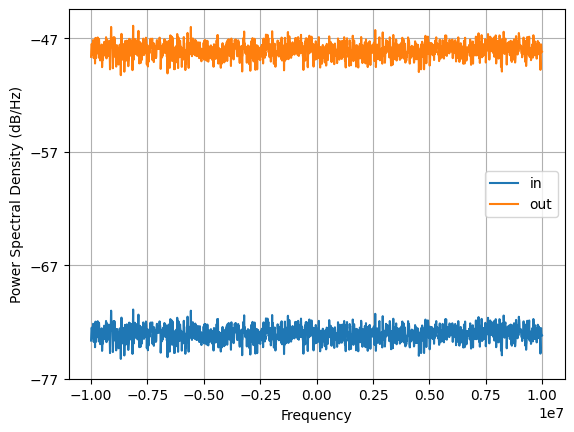

In [20]:
plt.psd(sig_in.x, NFFT=2048, Fs=fs, label="in")
plt.psd(sig_out.x, NFFT=2048, Fs=fs, label="out")
plt.legend()
plt.show()

# Compression

c:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


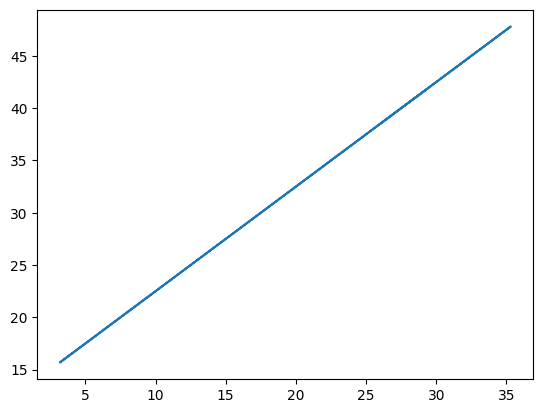

In [34]:
Pin_dbm  = 10*np.log10(sig_in.x) + 30
Pout_dbm = 10*np.log10(sig_out.x) + 30
plt.plot(Pin_dbm, Pout_dbm)
plt.show()

In [35]:
Pin_dbm

array([29.2200514  +6.35893972j, 22.52441078 -9.20879064j,
       26.68209005 -1.02697561j, ..., 26.09315619 -6.82400935j,
       28.97025713-12.83621335j, 25.99290991-11.50691003j],
      shape=(100000,))